In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\5_Education_Income\working sheet.csv')
df['Year']=pd.to_datetime(df['Year']).dt.year
# Yearly data, so just extract year from date

incomes= {'0': '0',
          '$5,000 to $9,999': '5k-10k',
          '$10,000 to $14,999':'10k-15k',
          '$15,000 to $24,999' :'15k-25k',
          '$25,000 to $34,999' :'25k-35k',
          '$35,000 to $49,999' :'35k-50k',
          '$50,000 to $74,999' :'50k-75k',
          '$75,000 and over' :'75k+'}

#Replace them for better visualization
df['income']=df['Personal Income'].replace(incomes)

#drop the row where no population
df = df.dropna()

sorted =['0', '5k-10k', '10k-15k', '15k-25k', '25k-35k', '35k-50k', '50k-75k','75k+']
deg_sorted= ['No high school diploma','High school or equivalent', 
             'Some college, less than 4-yr degree',"Bachelor's degree or higher"]
sns.set_style('ticks')

In [2]:
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count,avg_income,income
0,2008,00 to 17,Male,No high school diploma,0,650889.0,0.0,0
1,2008,00 to 17,Male,No high school diploma,"$5,000 to $9,999",30152.0,7499.5,5k-10k
2,2008,00 to 17,Male,No high school diploma,"$10,000 to $14,999",7092.0,12499.5,10k-15k
3,2008,00 to 17,Male,No high school diploma,"$15,000 to $24,999",3974.0,19999.5,15k-25k
4,2008,00 to 17,Male,No high school diploma,"$25,000 to $34,999",2606.0,29999.5,25k-35k
...,...,...,...,...,...,...,...,...
1041,2014,65 to 80+,Female,Bachelor's degree or higher,"$15,000 to $24,999",82988.0,19999.5,15k-25k
1042,2014,65 to 80+,Female,Bachelor's degree or higher,"$25,000 to $34,999",59607.0,29999.5,25k-35k
1043,2014,65 to 80+,Female,Bachelor's degree or higher,"$35,000 to $49,999",113584.0,42499.5,35k-50k
1044,2014,65 to 80+,Female,Bachelor's degree or higher,"$50,000 to $74,999",97657.0,62499.5,50k-75k


### Education level and income, population

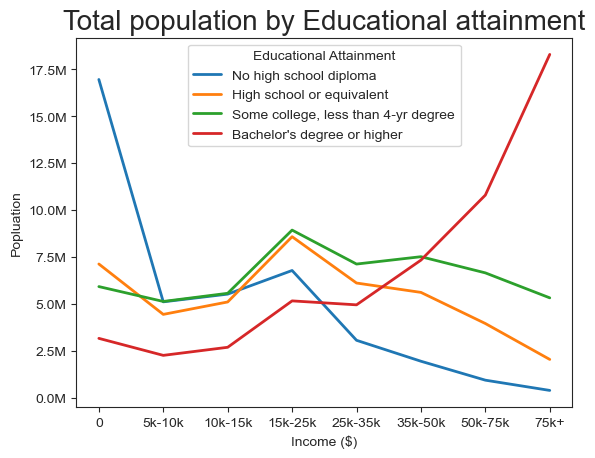

In [3]:
# copy from EDA
df_edu = df.pivot_table(values='Population Count',aggfunc='sum',index='Educational Attainment',columns='income')
df_edu =df_edu.reindex(sorted, axis=1)
df_edu = df_edu.T
df_edu =df_edu.reindex(deg_sorted, axis=1)

df_edu.plot(kind='line', lw=2)
plt.title('Total population by Educational attainment', fontsize=20)
plt.xlabel('Income ($)')

plt.ylabel('Popluation')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.1f}M'))



### How is trend of educational attainment through out 2008 to 2014?

In [39]:
df_total_year = df.pivot_table(index='Year',columns='Educational Attainment', values='Population Count', aggfunc='sum')

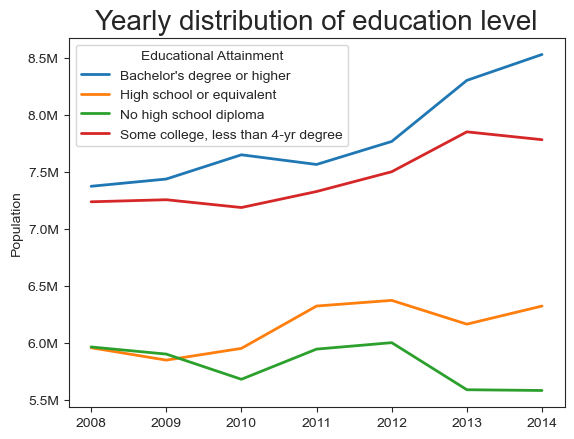

In [40]:

sns.color_palette('Set1')
df_total_year.plot(lw=2)
plt.title('Yearly distribution of education level', fontsize=20)
plt.xlabel('')
plt.ylabel('Population')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{float(x/1000000):.1f}M'))

- As 2014, there are more people who has higher degree.

### Yearly distribution of income

In [45]:
df_year_income = df.pivot_table(
    index='Year',columns='income', values='Population Count', aggfunc='sum'
    ).reindex(sorted, axis=1)
df_year_income

income,0,5k-10k,10k-15k,15k-25k,25k-35k,35k-50k,50k-75k,75k+
Year,,,,,,,,
2008,4340574.0,2317874.0,2653394.0,4038176.0,3006394.0,3321973.0,3354245.0,3499620.0
2009,4170709.0,2413487.0,2566399.0,4133546.0,3000267.0,3194738.0,3344505.0,3619166.0
2010,4458521.0,2414456.0,2648187.0,4121143.0,3000342.0,3127436.0,3174137.0,3524809.0
2011,4972917.0,2386477.0,2845689.0,4188021.0,2984613.0,3109746.0,3180524.0,3492101.0
2012,5092224.0,2595821.0,2702578.0,4352104.0,2988050.0,3171245.0,3035219.0,3704267.0
2013,4933677.0,2386766.0,2806085.0,4349486.0,3069742.0,3186155.0,3097880.0,4075675.0
2014,5192554.0,2407361.0,2638293.0,4260763.0,3181498.0,3278595.0,3139805.0,4116938.0


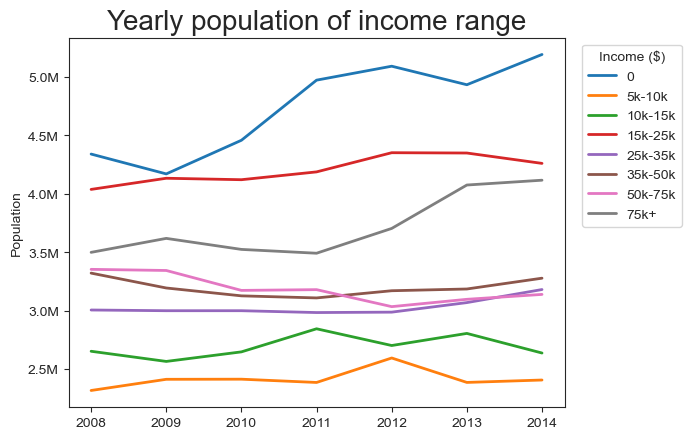

In [57]:
sns.color_palette('Set1')
df_year_income.plot(lw=2)
plt.title('Yearly population of income range', fontsize=20)
plt.xlabel('')
plt.ylabel('Population')
plt.legend(title='Income ($)',loc='upper right', bbox_to_anchor=(1.25, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{float(x/1000000):.1f}M'))

- Population of $0 income and  $75k+ income both are raised 

In [48]:
df_edu_income = df.pivot_table(index='Educational Attainment',aggfunc='sum',values='Population Count',columns='income').reindex(deg_sorted).reindex(sorted, axis=1)

df_edu_income

income,0,5k-10k,10k-15k,15k-25k,25k-35k,35k-50k,50k-75k,75k+
Educational Attainment,,,,,,,,
No high school diploma,16959363.0,5106194.0,5516889.0,6777351.0,3055748.0,1939568.0,930115.0,383643.0
High school or equivalent,7123415.0,4437069.0,5099457.0,8578826.0,6108940.0,5609304.0,3950500.0,2035415.0
"Some college, less than 4-yr degree",5919391.0,5126391.0,5561141.0,8930143.0,7120357.0,7512053.0,6649798.0,5318220.0
Bachelor's degree or higher,3159007.0,2252588.0,2683138.0,5156919.0,4945861.0,7328963.0,10795902.0,18295298.0


In [49]:
df_edu_income.idxmax()

income
0                       No high school diploma
5k-10k     Some college, less than 4-yr degree
10k-15k    Some college, less than 4-yr degree
15k-25k    Some college, less than 4-yr degree
25k-35k    Some college, less than 4-yr degree
35k-50k    Some college, less than 4-yr degree
50k-75k            Bachelor's degree or higher
75k+               Bachelor's degree or higher
dtype: object

-  $0 income is consisted by 'No high school diploma',
   
   while $75k+ income is constisted by 'Bachelor's degree or higher'

In [50]:
df_edu_income.T.idxmax()

Educational Attainment
No high school diploma                       0
High school or equivalent              15k-25k
Some college, less than 4-yr degree    15k-25k
Bachelor's degree or higher               75k+
dtype: object